# Flight Price Prediction

# Problem Statement

Flight ticket prices can be something hard to guess, today we might see a price, check
out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain.

Attribute Information : 

Airline: So this column will have all the types of airlines like Indigo, Jet Airways, Air India, and many more.

Date_of_Journey: This column will let us know about the date on which the passenger’s journey will start.

Source: This column holds the name of the place from where the passenger’s journey will start.

Destination: This column holds the name of the place to where passengers wanted to travel.

Route: Here we can know about what the route is through which passengers have opted to travel from his/her source to their destination.

Dep_Time represents the scheduled departure time of the flight

Arrival_Time: Arrival time is when the passenger will reach his/her destination.

Duration: Duration is the whole period that a flight will take to complete its journey from source to destination.

Total_Stops: This will let us know in how many places flights will stop there for the flight in the whole journey.

Additional_Info: In this column, we will get information about food, kind of food, and other amenities.

Price: Price of the flight for a complete journey including all the expenses before onboarding.

# Importing the important Libraries 

In [7]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
import pickle
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [9]:
df = pd.read_excel('Flight_Fare.xlsx')

In [12]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [14]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [16]:
df.shape

(10683, 11)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [20]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [22]:
df.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [24]:
for col in df.columns:
    print(f"\nValue counts for column: {col}")
    print(df[col].value_counts(dropna=False))


Value counts for column: Airline
Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

Value counts for column: Date_of_Journey
Date_of_Journey
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019

In [26]:
df.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

We dropped unused columns to reduce complexity and avoid unnecessary processing.
Columns like Route, Additional_Info may not add useful value (you already have Total_Stops, Duration).

# Handling Missing Values

In [54]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Price              0
dtype: int64

In [29]:
df[df.isnull().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
9039,Air India,6/05/2019,Delhi,Cochin,09:45,09:25 07 May,23h 40m,NaN,7480


In [31]:
df['Total_Stops'].fillna(df['Total_Stops'].mode()[0], inplace=True)

In [33]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

# EDA

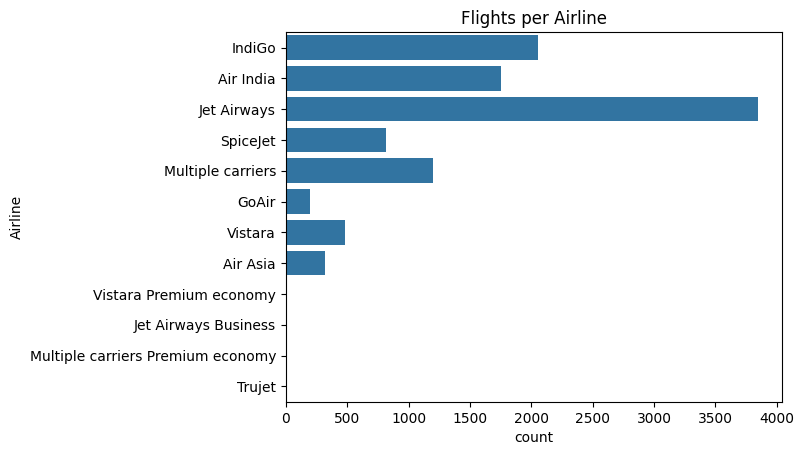

In [11]:
# Airline frequency
sns.countplot(y='Airline', data=df)
plt.title("Flights per Airline")
plt.show()

* Jet Airways, IndiGo, and Air India have the highest number of flights, showing they are the most frequent airlines in this dataset.

* Airlines like Trujet, Vistara Premium Economy, and Jet Airways Business have very few flights, making them rare categories.

* The airline data is imbalanced, so it's a good idea to group rare airlines into an "Other" category to improve model stability.

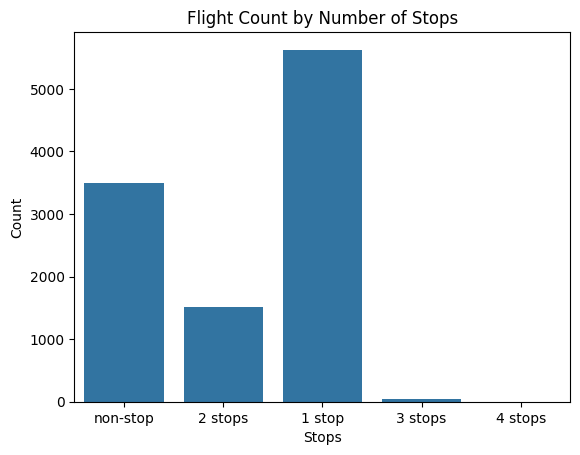

In [12]:
# Total Stops
sns.countplot(x='Total_Stops', data=df)
plt.title("Flight Count by Number of Stops")
plt.xlabel("Stops")
plt.ylabel("Count")
plt.show()

* Most flights are either 1-stop or non-stop, which shows high customer demand for faster .Airlines should focus on these segments to optimize pricing and maximize revenue.

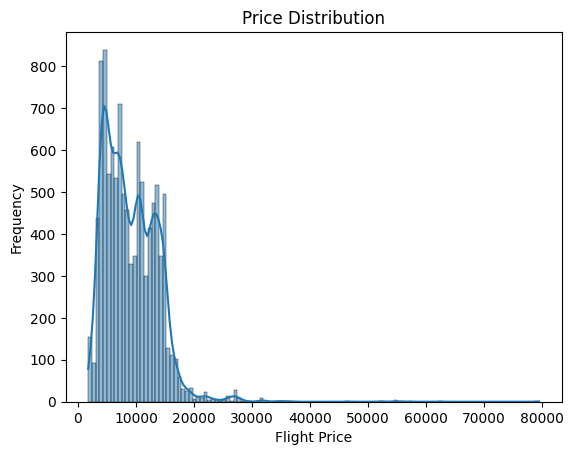

In [13]:
# Distribution of Price
sns.histplot(df['Price'], kde=True)
plt.title("Price Distribution")
plt.xlabel("Flight Price")
plt.ylabel("Frequency")
plt.show()

* Most flight prices are between ₹2,000 and ₹15,000, showing that budget to mid-range flights are very common.

* The distribution is right-skewed, which means a small number of flights are very expensive.

* Prices are not normally distributed so many models may need transformations.

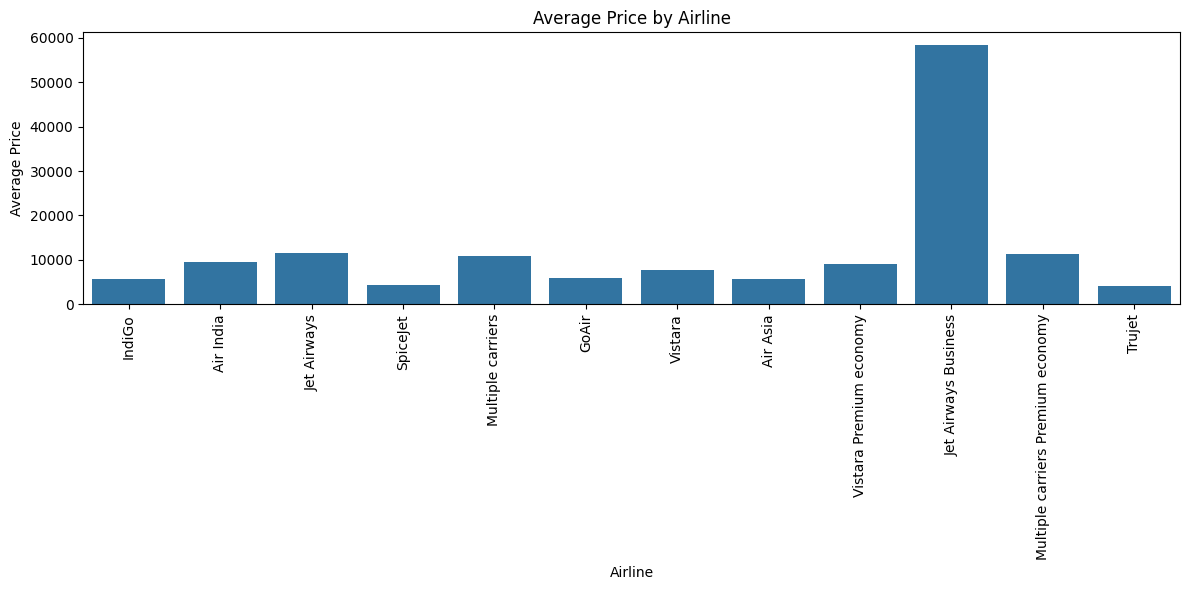

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Airline', y='Price', estimator='mean', ci=None,)
plt.xticks(rotation=90)
plt.title('Average Price by Airline')
plt.ylabel('Average Price')
plt.xlabel('Airline')
plt.tight_layout()
plt.show()

Jet Airways Business has the highest average flight price by a large margin, while airlines like IndiGo, Air Asia, SpiceJet, GoAir, and Trujet offer the lowest average prices; standard classes of Jet Airways, Air India, Vistara, and Multiple carriers fall in the mid-price range.

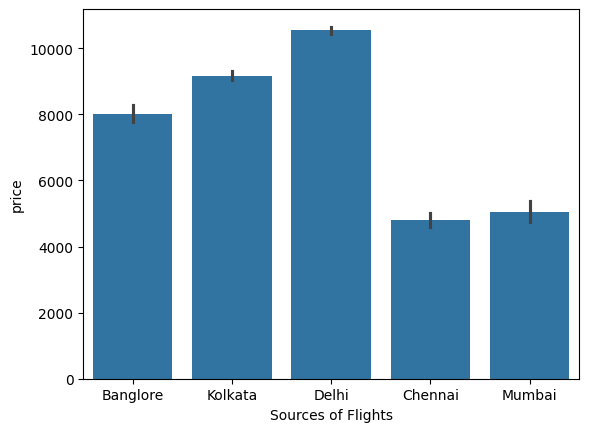

In [15]:
sns.barplot(x = 'Source', y = 'Price', data=df)
plt.xlabel('Sources of Flights')
plt.ylabel('price')
plt.show()

* *Flights starting from Delhi have the highest average price, which could be because of longer routes or business-class travelers.*

* *Flights from Chennai and Mumbai are the cheapest, showing these cities might offer more budget flights or shorter routes.*

* *Kolkata and Bangalore have medium average prices, indicating a balance between cheap and expensive flights.*

* *This shows that the city from where a flight starts affects its price, so Source is an important feature for prediction.*

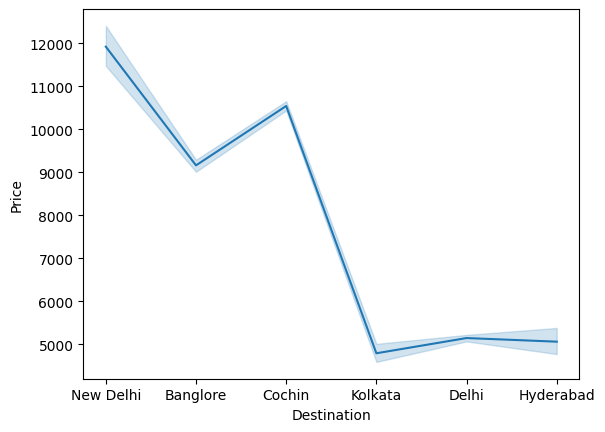

In [16]:
sns.lineplot(x = 'Destination', y = 'Price', data = df)
plt.xlabel('Destination')
plt.ylabel('Price')
plt.show()

* *Flights going to New Delhi, Cochin and Bangalore have the highest average price, making it the most expensive destination.*

* *Kolkata, Delhi, and Hyderabad have the lowest prices, meaning flights to these cities are more affordable.*

# Feature Engineering

In [17]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Price              0
dtype: int64

In [18]:
df['Total_Stops'].fillna(df['Total_Stops'].mode()[0], inplace=True)

In [19]:
df['Journey_day'] = pd.to_datetime(df['Date_of_Journey']).dt.day
df['Journey_month'] = pd.to_datetime(df['Date_of_Journey']).dt.month

In [20]:
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute
df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [21]:
duration = df['Duration'].str.extract('(?P<Hours>\d+)h\s*(?P<Minutes>\d*)m?')
duration['Hours'] = duration['Hours'].astype(float)
duration['Minutes'] = duration['Minutes'].replace('', 0).astype(float)
df['Duration_mins'] = duration['Hours'] * 60 + duration['Minutes']

In [22]:
df.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration'], axis=1, inplace=True)

In [23]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '2 stops': 2,
                                           '3 stops': 3, '4 stops': 4})

In [24]:
df = pd.get_dummies(df, columns=['Airline', 'Source', 'Destination'], drop_first=True, dtype=int)

In [25]:
df.isnull().sum()

Total_Stops                                  0
Price                                        0
Journey_day                                  0
Journey_month                                0
Dep_hour                                     0
Dep_min                                      0
Arrival_hour                                 0
Arrival_min                                  0
Duration_mins                                1
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chennai                               0
Source_Delhi 

In [26]:
df['Duration_mins'].fillna(df['Duration_mins'].median(), inplace=True)

In [27]:
X = df.drop('Price', axis=1)
y = df['Price']

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
X = pd.DataFrame(X_scaled, columns=X.columns)
X.head(2)

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_mins,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,-1.220744,1.237383,-1.467490,1.654259,-0.235050,-1.800427,-0.890057,-0.931744,-0.442912,-0.135998,...,-0.01676,-0.19231,-0.859188,-0.606227,-0.264193,-0.859188,-0.366493,-0.264193,-0.19231,3.234571
1,1.741483,-1.475239,0.250276,-1.303095,1.363492,-0.050851,-0.587124,-0.390194,2.257787,-0.135998,...,-0.01676,-0.19231,-0.859188,1.649546,-0.264193,-0.859188,-0.366493,-0.264193,-0.19231,-0.309160


In [30]:
y.head(2)

0    3897
1    7662
Name: Price, dtype: int64

# Training Model

In [31]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = lr_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print("Linear Regression Testing Results:")
print("R² Score:",r2)
print(f"MAE:",mae)
print(f"MSE:" ,mse)
print(f"RMSE:", rmse)

Linear Regression Testing Results:
R² Score: 0.6159285789316868
MAE: 1980.649894968502
MSE: 8128474.518446585
RMSE: 2851.0479684576662


In [34]:
y_pred = lr_model.predict(X_train)
r2 = r2_score(y_train, y_pred)
print('Linear Regression Training Results:', r2)

Linear Regression Training Results: 0.6246844721793168


In [35]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# 4. Evaluate
y_pred = ridge.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.6150342653016636


# Random Forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("Random Forest Regressor Testing Results:", r2_score(y_test, preds))
print("RMSE:", mean_squared_error(y_test, preds, squared=False))

Random Forest Regressor Testing Results: 0.8110992879987265
RMSE: 1999.471994474728


In [37]:
preds = model.predict(X_train)

print("Random Forest Regressor Training Results:", r2_score(y_train, preds))
print("RMSE:", mean_squared_error(y_train, preds, squared=False))

Random Forest Regressor Training Results: 0.9539311769088372
RMSE: 990.276323586929


In [38]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,
                           verbose=0,scoring='r2')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [39]:
y_pred = best_rf.predict(X_test)

# Evaluate model
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Random Forest Regressor Testing Results:", r2)
print("RMSE:", rmse)

Random Forest Regressor Testing Results: 0.8240022361869173
RMSE: 1929.9768649431217


In [40]:
preds = best_rf.predict(X_train)

print("Random Forest Regressor Training Results:", r2_score(y_train, preds))
print("RMSE:", mean_squared_error(y_train, preds, squared=False))

Random Forest Regressor Training Results: 0.9146342318338756
RMSE: 1348.0149640016436


# XGBRegressor

In [41]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    min_child_weight=3,
    gamma=0.2,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.5,
    reg_lambda=1,
    random_state=42
)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0.2, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=3, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [42]:
y_pred_xgb = xgb_model.predict(X_test)

r2 = r2_score(y_test, y_pred_xgb)
rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)

print("Regularized XGBoost Regressor Testing Result:", r2)
print("RMSE:", rmse)

Regularized XGBoost Regressor Testing Result: 0.8426256063707515
RMSE: 1825.011321828621


In [43]:
y_pred_xgb = xgb_model.predict(X_train)

r2 = r2_score(y_train, y_pred_xgb)
rmse = mean_squared_error(y_train, y_pred_xgb, squared=False)

print("Regularized XGBoost Regressor Training Result:", r2)
print("RMSE:", rmse)

Regularized XGBoost Regressor Training Result: 0.91706758010292
RMSE: 1328.6635038712704


In [44]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',  # use 'accuracy' for classification
    verbose=0,
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters and score
best_xgb = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


In [45]:
y_pred_xgb = best_xgb.predict(X_test)

r2 = r2_score(y_test, y_pred_xgb)
rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)

print("Regularized XGBoost Regressor Testing Result:", r2)
print("RMSE:", rmse)

Regularized XGBoost Regressor Testing Result: 0.8418587426227931
RMSE: 1829.4524325966418


In [46]:
y_pred_xgb = best_xgb.predict(X_train)

r2 = r2_score(y_train, y_pred_xgb)
rmse = mean_squared_error(y_train, y_pred_xgb, squared=False)

print("Regularized XGBoost Regressor Training Result:", r2)
print("RMSE:", rmse)

Regularized XGBoost Regressor Training Result: 0.913538133338435
RMSE: 1356.6416327818438


# GradientBoostingRegressor

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,
                                      random_state=42)

gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [48]:
y_pred_gb = gbr_model.predict(X_test)

r2 = r2_score(y_test, y_pred_gb)
rmse = mean_squared_error(y_test, y_pred_gb, squared=False)

print("Regularized Gradient Boosting Regressor Testing Result:", r2)
print("RMSE:", rmse)

Regularized Gradient Boosting Regressor Testing Result: 0.7724622809913954
RMSE: 2194.4476666088385


In [49]:
y_pred_gb = gbr_model.predict(X_train)

r2 = r2_score(y_train, y_pred_gb)
rmse = mean_squared_error(y_train, y_pred_gb, squared=False)

print("Regularized Gradient Boosting Regressor Training Result:", r2)
print("RMSE:", rmse)

Regularized Gradient Boosting Regressor Training Result: 0.7869768017386536
RMSE: 2129.4443125904695


In [50]:
gbr = GradientBoostingRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}

grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train, y_train)
best_gbr = grid_search.best_estimator_

In [51]:
y_pred_gb = best_gbr.predict(X_test)

r2 = r2_score(y_test, y_pred_gb)
rmse = mean_squared_error(y_test, y_pred_gb, squared=False)

print("Regularized Gradient Boosting Regressor Testing Result:", r2)
print("RMSE:", rmse)

Regularized Gradient Boosting Regressor Testing Result: 0.8432866840781853
RMSE: 1821.1741538475533


In [52]:
y_pred_gb = best_gbr.predict(X_train)

r2 = r2_score(y_train, y_pred_gb)
rmse = mean_squared_error(y_train, y_pred_gb, squared=False)

print("Regularized Gradient Boosting Regressor Training Result:", r2)
print("RMSE:", rmse)

Regularized Gradient Boosting Regressor Training Result: 0.9009337058115483
RMSE: 1452.164432946801


# CatBoostRegressor

In [53]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='RMSE',
    verbose=100,
    random_state=42
)

cat_model.fit(X_train, y_train)

0:	learn: 4333.4396332	total: 60ms	remaining: 60s
100:	learn: 1920.5917875	total: 153ms	remaining: 1.36s
200:	learn: 1702.2804267	total: 244ms	remaining: 969ms
300:	learn: 1570.5478085	total: 333ms	remaining: 774ms
400:	learn: 1476.5271460	total: 422ms	remaining: 630ms
500:	learn: 1410.2553397	total: 517ms	remaining: 515ms
600:	learn: 1359.2928488	total: 613ms	remaining: 407ms
700:	learn: 1312.1444261	total: 714ms	remaining: 304ms
800:	learn: 1273.4540587	total: 813ms	remaining: 202ms
900:	learn: 1242.2151580	total: 906ms	remaining: 99.5ms
999:	learn: 1219.2754295	total: 998ms	remaining: 0us


In [54]:
y_pred_gb = cat_model.predict(X_test)

r2 = r2_score(y_test, y_pred_gb)
rmse = mean_squared_error(y_test, y_pred_gb, squared=False)

print("Regularized CatBoost Regressor Testing Result:", r2)
print("RMSE:", rmse)

Regularized CatBoost Regressor Testing Result: 0.8632889575310982
RMSE: 1700.9843803658139


In [55]:
y_pred_gb = cat_model.predict(X_train)

r2 = r2_score(y_train, y_pred_gb)
rmse = mean_squared_error(y_train, y_pred_gb, squared=False)

print("Regularized CatBoost Regressor Training Result:", r2)
print("RMSE:", rmse)

Regularized CatBoost Regressor Training Result: 0.9301610067228093
RMSE: 1219.2754294667277


In [60]:
from pycaret.regression import *
reg_setup = setup(data=df, target='Price',  # change target to 'Price' for flight
                  session_id=123, 
                  normalize=True,
                  remove_outliers=True)

best_model = compare_models()
evaluate_model(best_model)

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(10683, 29)"
4,Transformed data shape,"(10309, 29)"
5,Transformed train set shape,"(7104, 29)"
6,Transformed test set shape,"(3205, 29)"
7,Numeric features,28
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1252.7799,3950528.1307,1971.6830,0.8202,0.1928,0.1448,0.3230
xgboost,Extreme Gradient Boosting,1248.4122,4067286.7029,1997.8186,0.8148,0.1968,0.1437,0.0500
lightgbm,Light Gradient Boosting Machine,1310.5455,4642927.8574,2112.1479,0.7938,0.1988,0.1520,0.3330
rf,Random Forest Regressor,1243.8342,4856641.1106,2170.4008,0.7811,0.2071,0.1416,0.2620
et,Extra Trees Regressor,1293.3992,5031000.0321,2232.0149,0.7683,0.2211,0.1458,0.2180
gbr,Gradient Boosting Regressor,1545.3735,5191094.1721,2258.5573,0.7633,0.2254,0.1823,0.1380
knn,K Neighbors Regressor,1510.8892,6011881.3835,2436.6147,0.7241,0.2473,0.1756,0.0380
dt,Decision Tree Regressor,1445.7983,7795826.1825,2762.0503,0.6451,0.2519,0.1606,0.0390
lasso,Lasso Regression,1964.1210,8151391.8637,2843.1218,0.6242,0.2893,0.2347,0.0350
ridge,Ridge Regression,1964.6974,8152420.0346,2843.3175,0.6241,0.2897,0.2349,0.0330


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

##  Business Insights from the Project
- **Airline** has a strong influence on price; business class and premium carriers significantly increase ticket cost.
- **Number of stops** affects fare — more stops often result in cheaper flights.
- **Source and Destination cities** show noticeable price trends — flights from Delhi and to New Delhi were often more expensive.
- **Departure/Arrival Time** impacts price; peak-hour flights tend to be more expensive.
- **Duration** and **journey month** also contribute to price variation, especially during holiday seasons.

## Challenges Faced & Solutions
| Challenge                                  | Solution                                                         |
|-------------------------------------------|------------------------------------------------------------------|
| Handling mixed time formats in `Duration`  | Converted all durations to minutes for uniformity               |
| Overfitting in ensemble models             | Applied hyperparameter tuning and regularization techniques     |
| Scaling only numerical values              | Used StandardScaler on continuous features only                 |
| High cardinality in categorical features   | Used one-hot encoding and grouped infrequent categories         |
| Imbalanced distributions & outliers        | Removed extreme outliers using IQR method                       |
| Large number of new encoded features       | Selected key contributors using feature importance              |


## Conclusion
This project shows how machine learning can effectively predict flight prices using features like airline, number of stops, source, destination, and travel time. Among all models tested, CatBoost Regressor gave the best results with a high R² score of 0.82, making it reliable for real-world use.

From a business point of view, this model can help airlines and travel websites offer dynamic pricing, create better deals, and understand what factors affect flight prices the most. It also helps improve customer experience by offering more accurate fare estimates, leading to smarter pricing and better sales strategies.